## Подготовка к работе

### Описание проекта

Были переданы данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки абонентская плата отсутствует;

* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra

* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

### Описание данных датафрейма

В основных данных есть информация о пользователях, их поездках и подписках.

* Пользователи — users_go.csv
 * user_id	уникальный идентификатор пользователя
 * name	имя пользователя
 * age	возраст
 * city	город
 * subscription_type	тип подписки (free, ultra)

* Поездки — rides_go.csv
 * user_id	уникальный идентификатор пользователя
 * distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
 * duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
 * date	дата совершения поездки

* Подписки — subscriptions_go.csv
 * subscription_type	тип подписки
 * minute_price	стоимость одной минуты поездки по данной подписке
 * start_ride_price	стоимость начала поездки
 * subscription_fee	стоимость ежемесячного платежа

### Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial
from scipy.stats import binom

## Загрузка данных

### Загрузка датафрейма

In [2]:
users = pd.read_csv("/datasets/users_go.csv")
rides = pd.read_csv("/datasets/rides_go.csv")
sub = pd.read_csv("/datasets/subscriptions_go.csv")

### Просмотр датафреймов и их описания

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
sub.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


## Предобработка данных

### Приведение типов

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format = "%Y-%m-%d")
rides['date'].head(5)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


### Создание столбца с номером месяца

In [11]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверка на аномалии

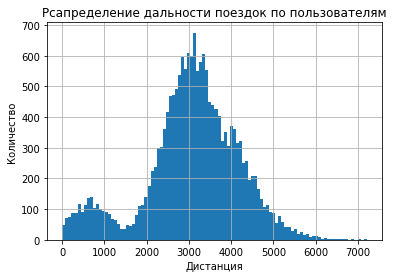

In [12]:
rides['distance'].hist(bins = 100)
plt.title('Рсапределение дальности поездок по пользователям') 
plt.xlabel('Дистанция')           
plt.ylabel('Количество')           
plt.show()

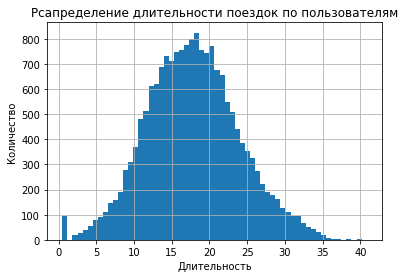

In [13]:
rides['duration'].hist(bins=60)
plt.title('Рсапределение длительности поездок по пользователям') 
plt.xlabel('Длительность')           
plt.ylabel('Количество')           
plt.show()

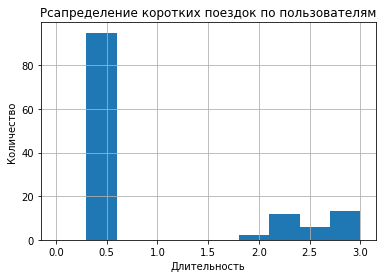

In [14]:
rides['duration'].hist(range=(0, 3))
plt.title('Рсапределение коротких поездок по пользователям') 
plt.xlabel('Длительность')           
plt.ylabel('Количество')           
plt.show()

Мы выявили около 80 поездок длительностью около 30 секунд, что не особенно имеет смысл (взять самокат - 10 секунд, сдать - 10 секунд, на катание всего 10 секунд???), так что мы их удалим

In [15]:
rides = rides[rides['duration']>2]
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17973 non-null  int64         
 1   distance  17973 non-null  float64       
 2   duration  17973 non-null  float64       
 3   date      17973 non-null  datetime64[ns]
 4   month     17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 842.5 KB


### Обработка дубликатов

#### Пользователи

In [16]:
users[users.duplicated(keep = False)].sort_values('user_id')

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


Мы получили полные повторения некоторых пользователей, оценим их долю в датафрейме

In [17]:
users.duplicated().sum()/len(users['user_id'])

0.019808306709265176

Доля состоавляет всего 1.98%, поэтому их можно удалить из датасета

In [18]:
users = users.drop_duplicates()
users.duplicated().sum()

0

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


#### Поездки

В данном датафрейме нет параметров, которые могли бы содержать дубликаты

In [20]:
rides.duplicated().sum()

0

#### Подписки

В данном датафрейме ситуация аналогична датафрейму поездок

In [21]:
sub.duplicated().sum()

0

### Обработка пропусков

Из пункта 2.2 можно сделать выводы, что данные датафреймы не содержат пропусков, необходимых для обработки

### Выводы

При обработке данных мы преобразовали даты к удобному для работы формату, а также избавились от полных дубликатов пользователей. 

Также мы проверили числовые данные о поездках на аномалии и выявили, что их распределение близко к нормальному, аномалий практически нет. Можно выявить, что поездки в районе 1000 метров создают локальный максимум, который важно также учитывать.

Также была выявлена аномалия с очень короткими поездками, которые мы удалили

## Исследовательский анализ данных

### Частота встречаемости городов

In [22]:
users.pivot_table(index = "city", aggfunc = "count")["user_id"].sort_values(ascending = False)

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: user_id, dtype: int64

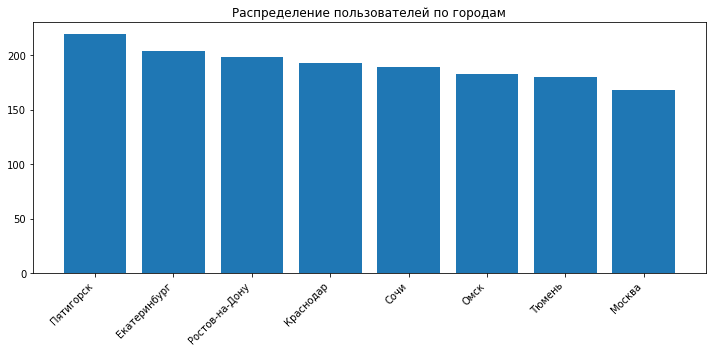

In [23]:
cities = users.pivot_table(index = "city", aggfunc = "count")["user_id"].sort_values(ascending = False)

plt.figure(figsize=(10, 5))
plt.bar(cities.index, cities)
plt.xticks(rotation=45, ha='right')
plt.title('Распределение пользователей по городам')
plt.tight_layout()
plt.show()

### Пользователи с подпиской\без подписки

In [24]:
users.pivot_table(index = "subscription_type", aggfunc = "count")['user_id']/len(users["user_id"])

subscription_type
free     0.544329
ultra    0.455671
Name: user_id, dtype: float64

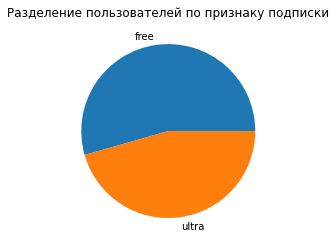

In [25]:
sub_type = users.pivot_table(index = "subscription_type", aggfunc = "count")['user_id']
plt.pie(sub_type, labels = sub_type.index)
plt.title('Разделение пользователей по признаку подписки')            
plt.show()

### Возраст пользователей

In [26]:
users.groupby('age').count()['user_id']

age
12      4
13      8
14      9
15     13
16     19
17     26
18     46
19     47
20     71
21     93
22    119
23    129
24    132
25    145
26    131
27    119
28    112
29     68
30     68
31     48
32     41
33     39
34     19
35     15
36      6
37      2
38      3
39      1
43      1
Name: user_id, dtype: int64

In [27]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

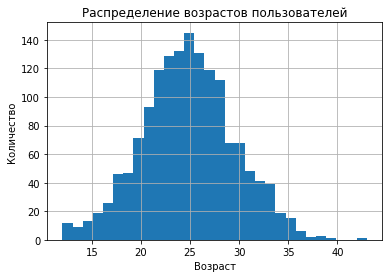

In [28]:
users['age'].hist(bins = 30)
plt.title('Распределение возрастов пользователей') 
plt.xlabel('Возраст')           
plt.ylabel('Количество')           
plt.show()

### Расстояние за одну поездку

In [29]:
rides['distance'].describe()

count    17973.000000
mean      3059.863833
std       1108.814612
min          0.855683
25%       2538.839628
50%       3129.029255
75%       3762.636244
max       7066.003772
Name: distance, dtype: float64

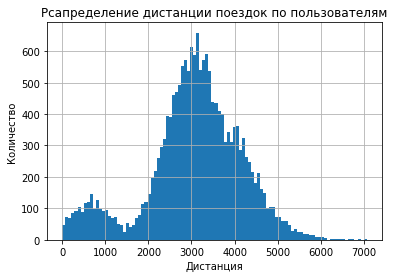

In [30]:
rides['distance'].hist(bins = 100)
plt.title('Рсапределение дистанции поездок по пользователям') 
plt.xlabel('Дистанция')           
plt.ylabel('Количество')           
plt.show()

### Продолжительность поездок

In [31]:
rides['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

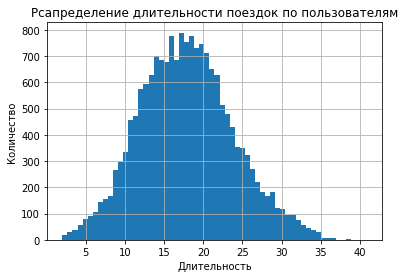

In [32]:
rides['duration'].hist(bins = 60)
plt.title('Рсапределение длительности поездок по пользователям') 
plt.xlabel('Длительность')           
plt.ylabel('Количество')           
plt.show()

### Вывод

Проведя исследовательский анализ данных, мы пришли к следующим выводам:
1. Самый популярный город - Пятигорск, в нем больше всего наших клиентов
2. Соотношение пользователей с подпиской и без нее примерно равно 55% и 45% соответственно
3. Основная возрастная группа пользователей - молодые люди от 22 до 28 лет
4. Средняя длина поездки - 3000 метров, но также можно наблюдать локальный подъем в области 1000 метров
5. Средняя длительность поездки - 17 минут

## Объединение данных

### Объединение датафреймов

In [33]:
merged_df = users.merge(rides, on = 'user_id', how='left')

In [34]:
merged_df = merged_df.merge(sub, on = 'subscription_type', how = "left")

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   name               17973 non-null  object        
 2   age                17973 non-null  int64         
 3   city               17973 non-null  object        
 4   subscription_type  17973 non-null  object        
 5   distance           17973 non-null  float64       
 6   duration           17973 non-null  float64       
 7   date               17973 non-null  datetime64[ns]
 8   month              17973 non-null  int64         
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [36]:
merged_df.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


### Создание двух дополнительных датафреймов

#### Без подписки

In [37]:
full_free = merged_df.query('subscription_type == "free"')
full_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11473 entries, 6500 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11473 non-null  int64         
 1   name               11473 non-null  object        
 2   age                11473 non-null  int64         
 3   city               11473 non-null  object        
 4   subscription_type  11473 non-null  object        
 5   distance           11473 non-null  float64       
 6   duration           11473 non-null  float64       
 7   date               11473 non-null  datetime64[ns]
 8   month              11473 non-null  int64         
 9   minute_price       11473 non-null  int64         
 10  start_ride_price   11473 non-null  int64         
 11  subscription_fee   11473 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [38]:
full_free.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


#### С подпиской

In [39]:
full_ultra = merged_df.query('subscription_type == "ultra"')
full_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 660.2+ KB


In [40]:
full_ultra.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


### Визуализация данных о поездках в среднем по пользователю

#### С подпиской

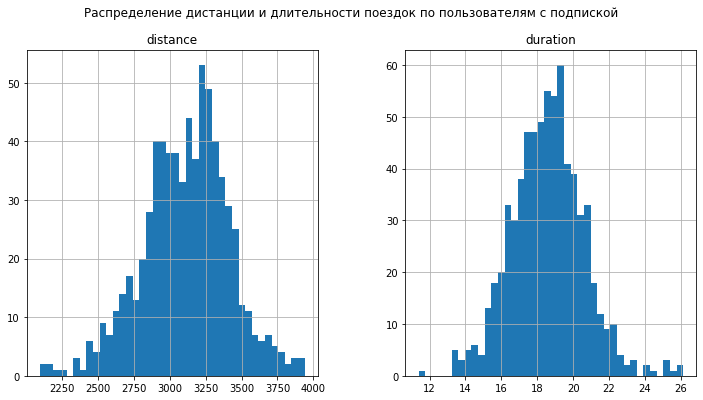

In [41]:
full_ultra.groupby('user_id').agg({'distance': 'mean','duration': 'mean'}).hist(bins=40, figsize=(12, 6))
plt.suptitle('Распределение дистанции и длительности поездок по пользователям с подпиской')            
plt.show()

In [42]:
full_ultra.groupby('user_id').agg({'distance': 'mean','duration': 'mean'}).describe()

,distance,duration
count,699.000000,699.000000
mean,3113.459926,18.574380
std,299.706136,2.015094
min,2098.297845,11.385922
25%,2925.005435,17.278630
50%,3134.349186,18.585189
75%,3312.191643,19.789236
max,3939.773328,26.136000


#### Время поездки

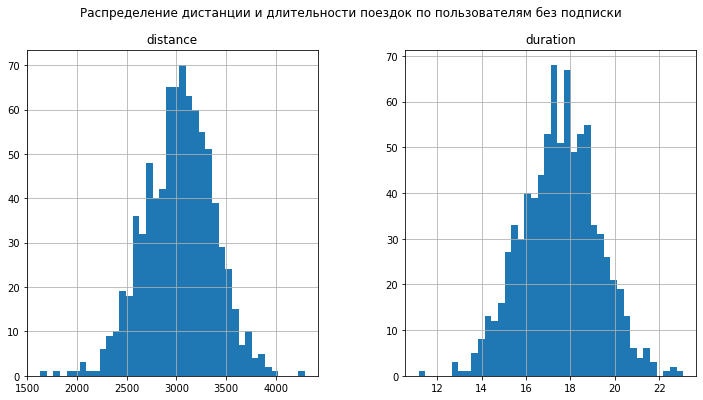

In [43]:
full_free.groupby('user_id').agg({'distance': 'mean','duration': 'mean'}).hist(bins=40, figsize=(12, 6))
plt.suptitle('Распределение дистанции и длительности поездок по пользователям без подписки')
plt.show()

In [44]:
full_free.groupby('user_id').agg({'distance': 'mean','duration': 'mean'}).describe()

,distance,duration
count,835.000000,835.000000
mean,3029.490437,17.526180
std,346.157301,1.712301
min,1630.788427,11.163431
25%,2798.050497,16.386659
50%,3043.898267,17.553691
75%,3263.868485,18.681857
max,4287.519387,23.069943


#### Сравнение

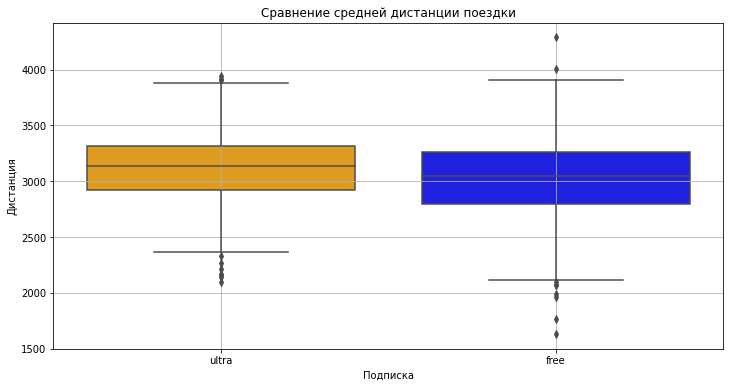

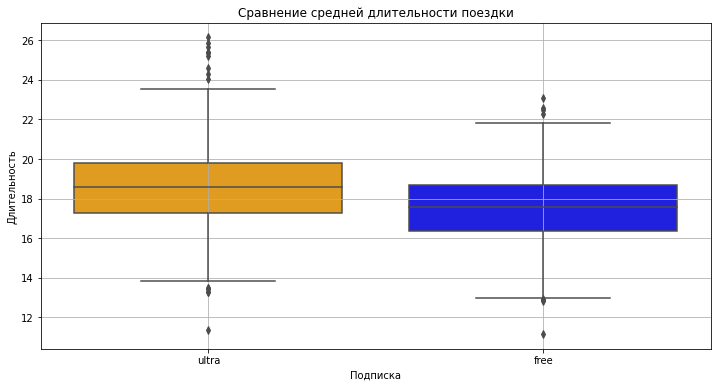

In [45]:
ultra_means = full_ultra.groupby('user_id').agg({'distance': 'mean', 'duration': 'mean'}).assign(subscription='ultra')
free_means = full_free.groupby('user_id').agg({'distance': 'mean', 'duration': 'mean'}).assign(subscription='free')
combined = ultra_means.append(free_means)

plt.figure(figsize=(12, 6))
sns.boxplot(x='subscription', y='distance', data=combined, palette={'ultra': 'orange', 'free': 'blue'})
plt.title('Сравнение средней дистанции поездки')
plt.xlabel('Подписка')
plt.ylabel('Дистанция')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='subscription', y='duration', data=combined, palette={'ultra': 'orange', 'free': 'blue'})
plt.title('Сравнение средней длительности поездки')
plt.xlabel('Подписка')
plt.ylabel('Длительность')
plt.grid(True)
plt.show()

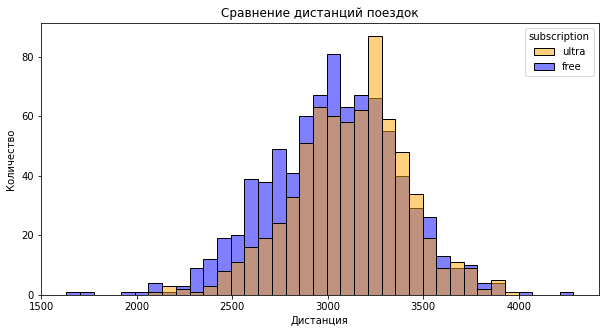

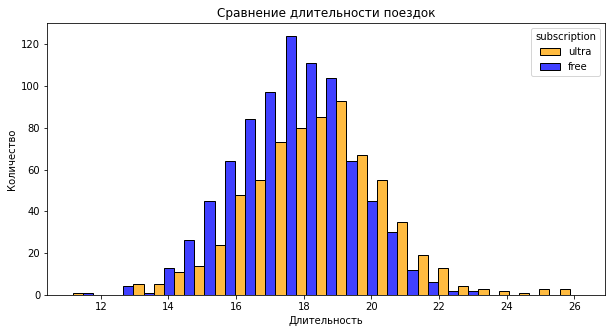

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(data=combined, x='distance', hue='subscription', 
              palette=['orange', 'blue'])
plt.title('Сравнение дистанций поездок')
plt.xlabel('Дистанция')
plt.ylabel('Количество ')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=combined, x='duration', hue='subscription', 
             multiple='dodge', binwidth=0.6,palette=['orange', 'blue'])
plt.title('Сравнение длительности поездок')
plt.xlabel('Длительность')
plt.ylabel('Количество')
plt.show()

#### Выводы

**Дистанция поездки:**

* Пользователи с подпиской (ultra):

 * Средняя дистанция: 3115 м (близко к оптимальным 3130 м)

 * Менее изменчивы (σ = 300 м)

 * Медиана: 3134 м

 * 75% пользователей ездят ≤ 3560 м
 
 * Больше пользователей, которые катаются близко

* Пользователи без подписки (free):

 * Средняя дистанция: 3029 м (на 86 м меньше)

 * Более широкий разброс (σ = 346 м)

 * Медиана: 3043 м

 * 25% пользователей ездят ≤ 2798 м

**Длительность поездки:**

* ultra-пользователи:

 * Среднее время: 18.57 мин

 * Более стабильное поведение (σ = 2.02 мин)

 * 75% поездок ≤ 19.79 мин
 
 * Больше пользователей с малой длительностью поездки

* free-пользователи:

 * Среднее время: 17.53 мин (на 1 мин меньше)

 * Больше выбросов (σ = 1.71 мин)

 * 25% поездок ≤ 16.39 мин
 
 * Больше пользователей, которые катаются долго
 
**Общий вывод**

Когда у пользователя есть подписка, ему легче начать движение, поэтому они чаще берут самокаты на малое время и расстояние. Пользователи без подписки относятся к этому ответственнее и берут самокаты на более долгие поездки

## Подсчёт выручки

### Данные о пользователях за каждый месяц

In [47]:
merged_df['duration'] = np.ceil(merged_df['duration'])
merged_df['income'] = merged_df['start_ride_price'] + merged_df['duration']*merged_df['minute_price']
agregate_df = merged_df.groupby(['user_id','month','subscription_type','subscription_fee']).agg({'distance': 'sum','duration': 'sum', 'income':'sum'}).reset_index()
agregate_df

,user_id,month,subscription_type,subscription_fee,distance,duration,income
0,1,1,ultra,199,7027.511294,42.0,252.0
1,1,4,ultra,199,754.159807,7.0,42.0
2,1,8,ultra,199,6723.470560,46.0,276.0
3,1,10,ultra,199,5809.911100,32.0,192.0
4,1,11,ultra,199,7003.499363,56.0,336.0
...,...,...,...,...,...,...,...
11295,1534,6,free,0,3409.468534,26.0,308.0
11296,1534,8,free,0,7622.453034,48.0,484.0
11297,1534,9,free,0,4928.173852,23.0,234.0
11298,1534,11,free,0,13350.015305,78.0,824.0


### Помесячная выручка

In [48]:
agregate_df['income'] = agregate_df['income'] + agregate_df['subscription_fee']

In [49]:
agregate_df.head(10)

,user_id,month,subscription_type,subscription_fee,distance,duration,income
0,1,1,ultra,199,7027.511294,42.0,451.0
1,1,4,ultra,199,754.159807,7.0,241.0
2,1,8,ultra,199,6723.470560,46.0,475.0
3,1,10,ultra,199,5809.911100,32.0,391.0
4,1,11,ultra,199,7003.499363,56.0,535.0
5,1,12,ultra,199,6751.629942,28.0,367.0
6,2,3,ultra,199,10187.723006,63.0,577.0
7,2,4,ultra,199,6164.381824,40.0,439.0
8,2,6,ultra,199,3255.338202,14.0,283.0
9,2,7,ultra,199,6780.722964,48.0,487.0


## Проверка гипотез

### Пользователи с подпиской катаются дольше?

In [50]:
full_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [51]:
full_free['duration'].describe()

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

Необходимо вытянуть из каждого датафрейма выборки по времени

Составим двустороннюю гипотезу: Н0 - средние значения времени поездки должны быть равны для двух независимых выборок, иначе Н1 - средние значения у пользователей без подписки ниже

In [52]:
alpha = 0.01

full_free_time = full_free['duration']
full_ultra_time = full_ultra['duration']

results = st.ttest_ind(full_free_time, full_ultra_time, alternative = "less")
p_value = results.pvalue

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Нет основания для отказа от гипотезы")

Отвергаем нулевую гипотезу


Используя тест, мы выявили, что Нулевая гипотеза, то есть равенство между пользователями с подпиской и без, не подтвердилось, поэтому мы получаем, что пользователи без подписки катаются на самокатах меньше по времени

### Среднее расстояние не превышает оптимальное для износа?

In [53]:
full_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Проверим гипотезу

Н0: Среднее расстояние поездки у пользователей с подпиской равно 3130 м, aльтернативная гипотеза: Среднее расстояние поездки у пользователей с подпиской больше 3130 м

In [54]:
alpha = 0.01

optimum = 3130
trail = full_ultra['distance']

results = st.ttest_1samp(trail, optimum, alternative = 'greater')
p_value = results.pvalue

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Нет основания для отказа от гипотезы")

Нет основания для отказа от гипотезы


Так как по итогу теста мы не нашли оснований для отказа от нулевой гипотезы, мы получаем, что пользователи с подпиской катаются на самокатах в рамках оптимальных технических ограничений. Также этот результат подтвердился средним расстоянием в 3115 метров

### Пользователи с подпиской помесячно выгоднее, чем без нее?

In [55]:
agregate_df.groupby(['month', 'subscription_type']).agg({'income':'sum'})

income
month subscription_type          
1     free               193328.0
      ultra              144108.0
2     free               165392.0
      ultra              124572.0
3     free               186576.0
      ultra              142608.0
4     free               185192.0
      ultra              137318.0
5     free               187566.0
      ultra              149235.0
6     free               191854.0
      ultra              143834.0
7     free               184632.0
      ultra              143466.0
8     free               186652.0
      ultra              138534.0
9     free               193352.0
      ultra              129337.0
10    free               181196.0
      ultra              133932.0
11    free               178438.0
      ultra              126546.0
12    free               194416.0
      ultra              131047.0

Необходимо подготовить две выборки с помесячными доходностями для пользователей с подписками или без них.

Далее гипотеза:

Средняя помесячная выручка от пользователей с подпиской и без - равны, альтернативная гипотеза: Средняя помесячная выручка пользователей с подпиской больше

In [56]:
free_monthly_income = agregate_df.query('subscription_type == "free"')['income']
ultra_monthly_income = agregate_df.query('subscription_type == "ultra"')['income']

alpha = 0.01

results = st.ttest_ind(ultra_monthly_income, free_monthly_income, alternative = 'greater', equal_var = False)
p_value = results.pvalue

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print("Нет основания для отказа от гипотезы")

Отвергаем нулевую гипотезу


По итогам теста мы отвергаем нулевую гипотезу, поэтому мы можем сделать вывод, что пользователи с подпиской тратят больше денег

### Сравнение обращений в поддержку до и после обновления

В данном случае понадобится тест для двух зависимых выборок, который выглядит как scipy.stats.ttest_rel(выборка1, выборка2, alternative = 'less')

Нулевая гипотеза - среднее количество обращений не изменилось, то есть после обновления среднее число равно среднему числу до обновления, альтернативная гипотеза - обращений стало меньше

## Распределения

### Акция с промокодами

In [57]:
def min_N(target=100, p=0.1, max_fail=0.05):
    for N in range (1000, 2000):
        distr = binom(N, p)
        fail = distr.cdf(target-1)
        if fail <= max_fail:
            return N

N = min_N()
N

1161

Для того чтобы выполнить план с вероятностью 5% что будет менее 100 продлений подписок - необходимо отправить 1161 промокод

### Push-уведомления

In [58]:
n = 1000000
p=0.4

mu = n*p
sigma = (n*p*(1-p))**0.5

distr = st.norm(mu, sigma)
distr.cdf(399500)

0.15371708296369768

Вероятность того, что ссылку откроют не более 399500 пользователей равна 15,37%

## Выводы

**Пользовательская база:**

* Основная аудитория — молодые люди 22-28 лет.

* Наибольшее количество пользователей в Пятигорске, наименьшее — в Москве.

* Соотношение подписок: 55% без подписки (free), 45% с подпиской (ultra).

**Поездки:**

* С подпиской ultra:

 * Пользователи с подпиской за счет бесплатного старта охотнее берут самокаты на повседневную основу - короткие и быстрые поездки
 
 * Пользователи с подпиской ездят в среднем дольше на 6% и дальше на 3%

* Без подписки (free):

 * Пользователи без подписки чаще берут самокаты на длительное время расстояние
 
 * В среднем пользователи без подписки катаются меньше, это может быть связано с платой за старт

**Финансовая эффективность:**

* Пользователи с подпиской приносят больше дохода (гипотеза подтверждена, p-value < 0.01), несмотря на меньшую стоимость минуты (6 руб. vs 8 руб. у free).

* Основной доход для ultra формируется за счёт абонентской платы (199 руб./мес.) и более частых поездок.

**Технические аспекты:**

* Дистанция поездок у ultra-пользователей не превышает оптимальные значения для износа самокатов (p-value > 0.01).

**Маркетинговые задачи:**

* Для акции с промокодами необходимо разослать 1161 промокод, чтобы достичь 100 продлений с риском ≤ 5%.

* Вероятность, что push-уведомление откроют ≤ 399.5 тыс. пользователей из 1 млн — 15.4%.